In [1]:
import torch
import numpy as np

from data import Interval, Function, Data
from model import FCNet
from solver import ODESolver
from plotting import ODEPlotter

device = torch.device('cpu')

Differential equation:

$y''(x) = - y(x)$

Initial conditions:

$y(0) = \frac{\sqrt{2}}{2}; y'(0) = \frac{\sqrt{2}}{2} $

Analytic solution:

$y(x) = \frac{\sqrt{2}}{2} \text{sin}(x) + \frac{\sqrt{2}}{2} \text{cos}(x)$

In [2]:
def f(x, y, dydx, d2ydx2):
    return d2ydx2 + y

def sol(x):
    return np.sqrt(2)/2*torch.sin(x) + np.sqrt(2)/2*torch.cos(x)

def d_sol(x):
    return np.sqrt(2)/2*torch.cos(x) - np.sqrt(2)/2*torch.sin(x)

def d2_sol(x):
    return -(np.sqrt(2)/2*torch.sin(x) + np.sqrt(2)/2*torch.cos(x))

ode = Function(f)
solution = Function(sol)
initial_conditions = [0.0, np.sqrt(2)/2, np.sqrt(2)/2]

Differential equation:

$y''(x) = -0.1 \text{ } y'(x) - 5 \text{ } y(x) $

Initial conditions:

$ y(0) = 1, y'(0) = 0 $

Analytic solution:

$ y(x) = e^{-\frac{x}{20}}(\frac{1}{\sqrt{399}}{\text{sin}(\frac{\sqrt{399}x}{20}}) + \text{cos}(\frac{\sqrt{399}x}{20})) $ 

In [3]:
# def ode(x, y, dydx, d2ydx2):
#     return d2ydx2 + 0.1 * dydx + 5.0 * y

# def sol(x):
#     return  torch.exp(-x/20) * (1 / np.sqrt(1999) * torch.sin(np.sqrt(1999) * x / 20) + torch.cos(np.sqrt(1999) * x / 20))

# def d_sol(x):
#     return -torch.exp(-x/20) * 100 / np.sqrt(1999) * torch.sin(np.sqrt(1999) * x / 20)

# def d2_sol(x):
#     return -0.1 * d_sol(x) - 5 * sol(x)

# initial_conditions = [0.0, 1.0, 0.0]

In [4]:
features_in = 1
features_out = 1
hidden = [100, 100, 100, 100]

model = FCNet(features_in, hidden, features_out, activation='cas', init_weights=False)

domain = Interval(0, 2*np.pi, steps=100)
data = Data(domain, ode, initial_conditions, solutions=solution)

solver = ODESolver(model, data, device=device)
solver.compile('adamW', lr=1e-3, loss_weights=[1.0, 1.0], opt={}, sch={'step_size': 100, 'gamma': 0.95})

losses = solver.train(num_epochs=1000, atol=1e-5, save_gif=True)
solver.create_gif(gif_save_path='gif_test4')

Training Progress:  44%|███████████▍              | 442/1000 [00:05<00:06, 82.77it/s, Loss: 0.00000998 | LR: 0.00081451]


Stopping criterion met at epoch 442: Loss is less than 1e-05.
GIF saved at gif_test4/cas_100_100_100_100.gif


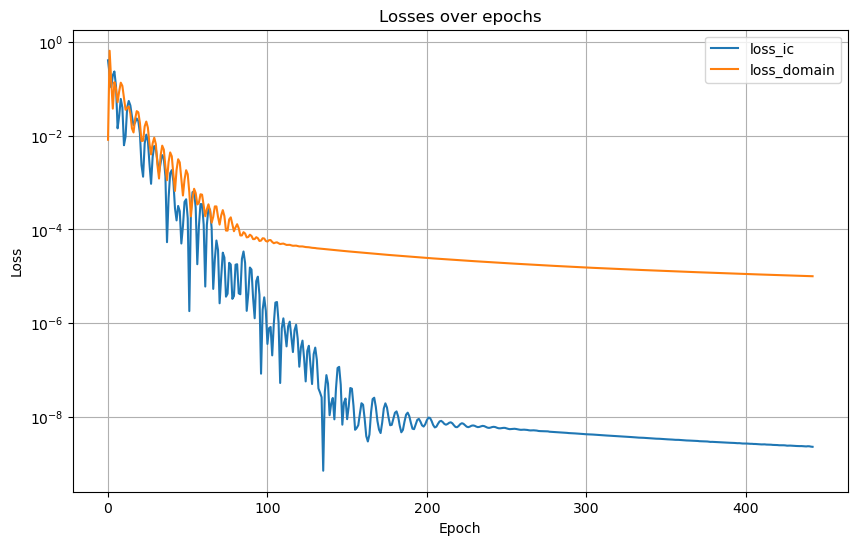

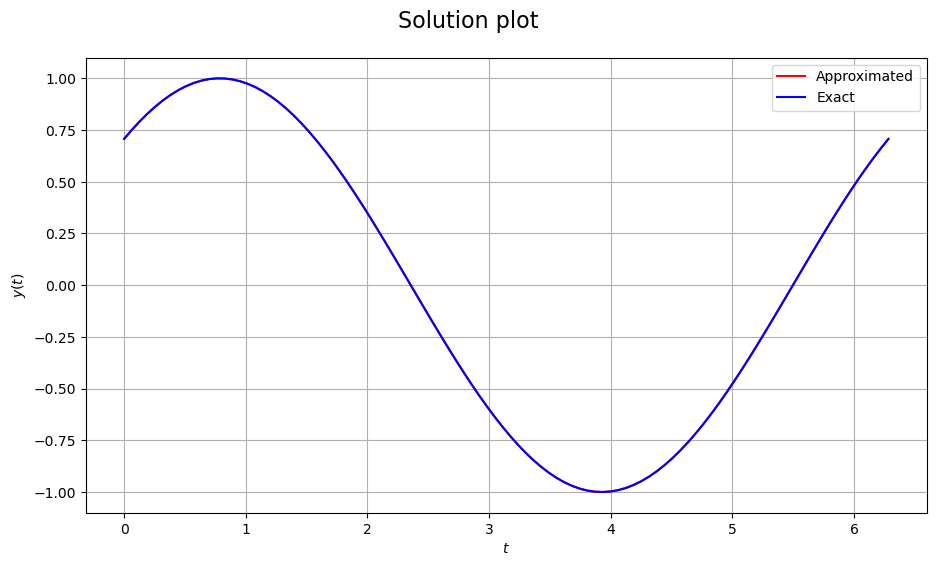

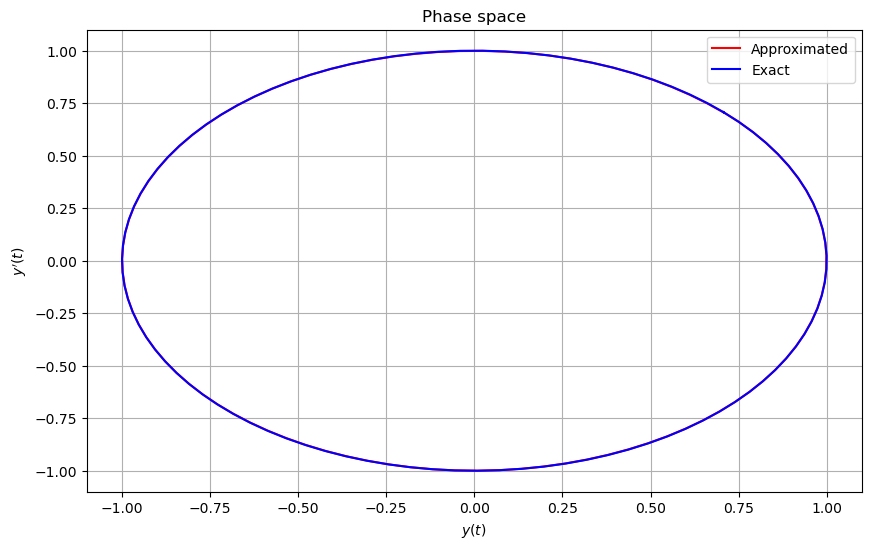

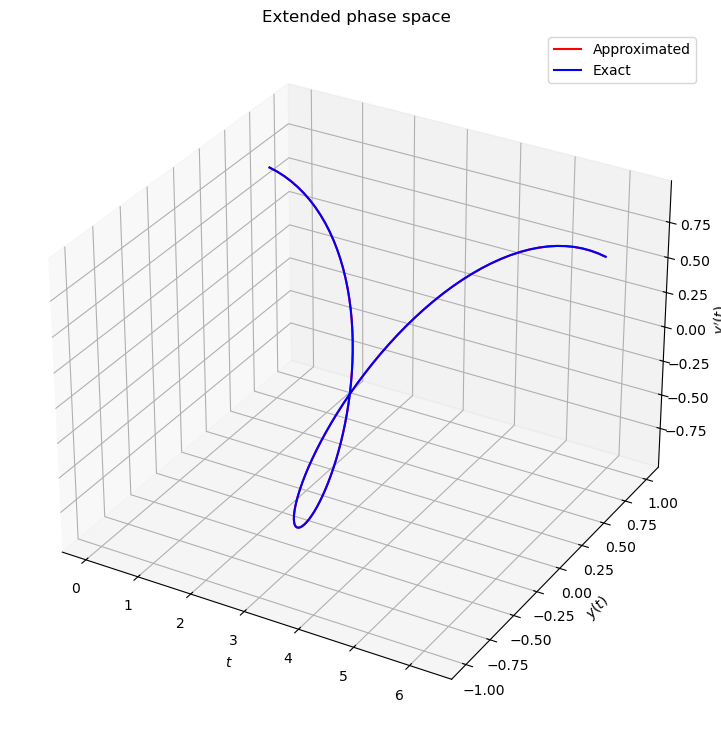

In [5]:
plot = ODEPlotter(solver)
plot.losses(losses)
plot.numerical_solution()
plot.phase_space(exact_derivatives=[d_sol])
plot.extended_phase_space(exact_derivatives=[d_sol])

In [6]:
solver.evaluate(value=0.0, exact_derivatives=[d_sol, d2_sol])

Model parameter count: 60301
--- At t = 0.0000 ---
Solution | Computed: 0.7070, Exact: 0.7071, Abs Error: 0.0001
Derivative order 1 | Computed: 0.7071, Exact: 0.7071, Abs Error: 0.0000
Derivative order 2 | Computed: -0.6948, Exact: -0.7071, Abs Error: 0.0123

